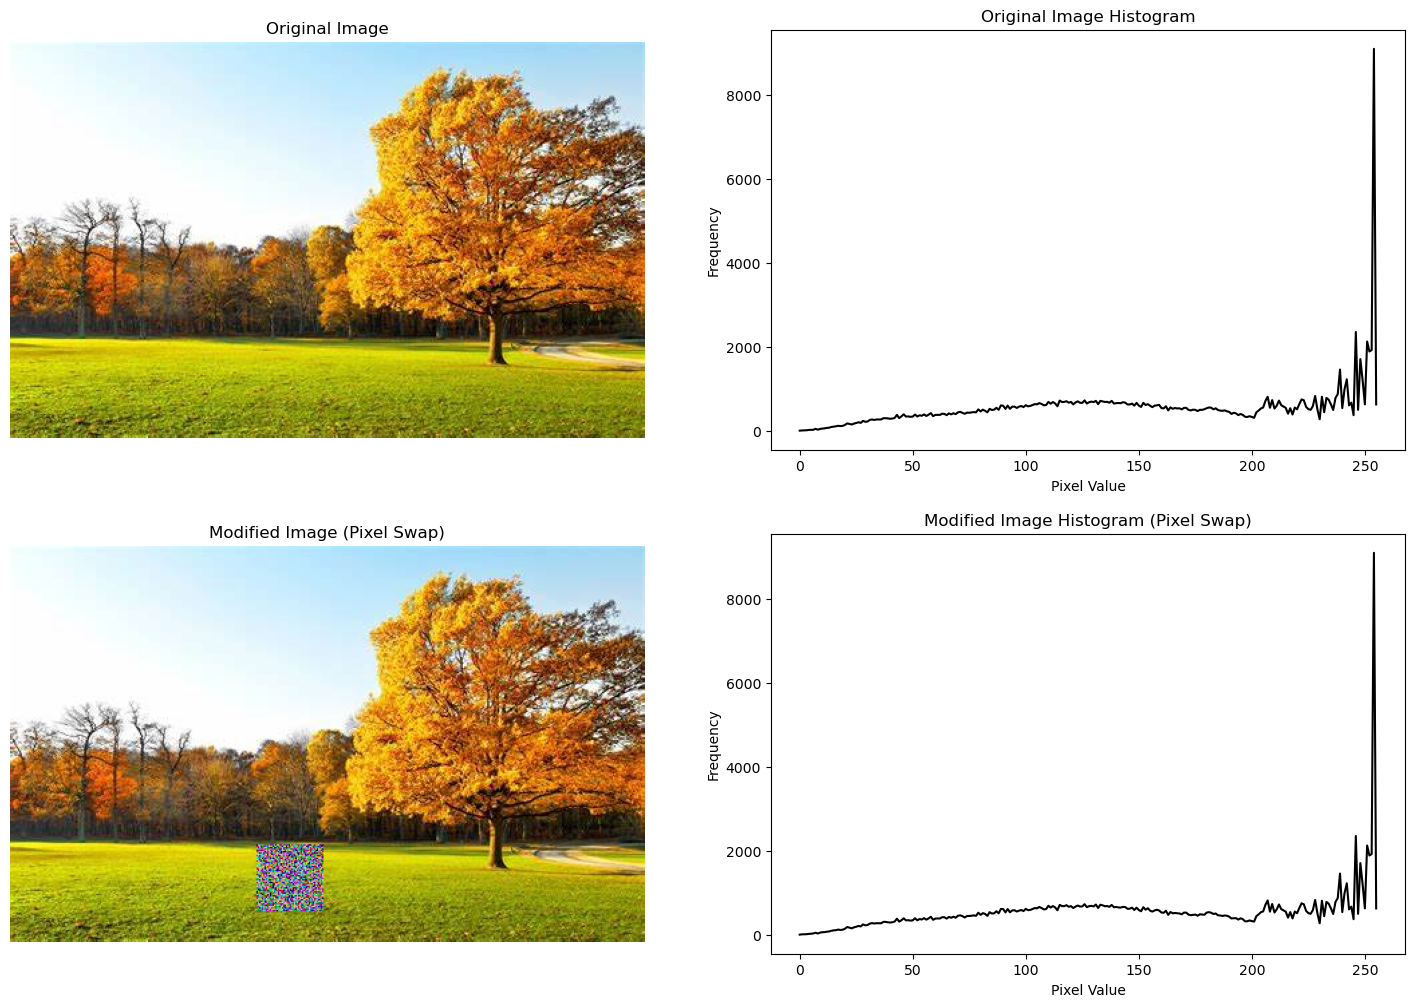

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_histogram(image):
    # Convert the image to grayscale using Open CV library
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Compute histogram based on open CV library. 
    histogram = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

    return histogram

def swap_pixel_values(image, window_size=10):
    # Get the shape of the image
    height, width, _ = image.shape

    # Randomly select the top-left corner of the window
    top_left_x = np.random.randint(0, width - window_size)
    top_left_y = np.random.randint(0, height - window_size)

    # Extract the 10x10 window
    window = image[top_left_y:top_left_y+window_size, top_left_x:top_left_x+window_size]

    # Flatten the window pixel values
    window_flat = window.flatten()

    # Randomly shuffle the pixel values within the window
    np.random.shuffle(window_flat)

    # Apply the modified values back to the image
    image_modified = image.copy()
    image_modified[top_left_y:top_left_y+window_size, top_left_x:top_left_x+window_size] = window_flat.reshape((window_size, window_size, 3))

    return image_modified

def plot_images_and_histogram(image_path, window_size=10):
    # Load the image
    original_image = cv2.imread(image_path)

    if original_image is None:
        print(f"Error: Unable to load the image from the path: {image_path}")
        return

    # Compute the original histogram
    original_histogram = compute_histogram(original_image)

    # Swap pixel values within a nxm window
    modified_image = swap_pixel_values(original_image, window_size)

    # Compute the modified histogram
    modified_histogram = compute_histogram(modified_image)

    # Plot in two rows
    plt.figure(figsize=(18, 12))

    # First row: Original image and its histogram
    plt.subplot(2, 2, 1)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.plot(original_histogram, color='black')
    plt.title('Original Image Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

    # Second row: Modified image and its histogram
    plt.subplot(2, 2, 3)
    plt.imshow(cv2.cvtColor(modified_image, cv2.COLOR_BGR2RGB))
    plt.title('Modified Image (Pixel Swap)')
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.plot(modified_histogram, color='black')
    plt.title('Modified Image Histogram (Pixel Swap)')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

    plt.show()

# Provide the path to the nature image
image_path = 'nature_image.jpeg'
plot_images_and_histogram(image_path, window_size=50)


# <span style="color:blue">Definition of PSNR</span>

-The Peak Signal-to-Noise Ratio (PSNR) of an image is a numerical measure used to evaluate the quality of a reconstructed or compressed image in comparison to the original, uncompressed image. 
-It quantifies the ratio between the maximum possible power of the signal (the peak signal) and the power of the noise introduced by compression or reconstruction errors. 
$$
\text{PSNR} = 10 \cdot \log_{10}\left(\frac{\text{MAX}^2}{\text{MSE}}\right)
$$
-MAX is the maximum possible pixel value (for example, 255 for an 8-bit grayscale image).

-MSE is the Mean Squared Error, which is the average of the squared differences between the pixel values of the original and reconstructed images.


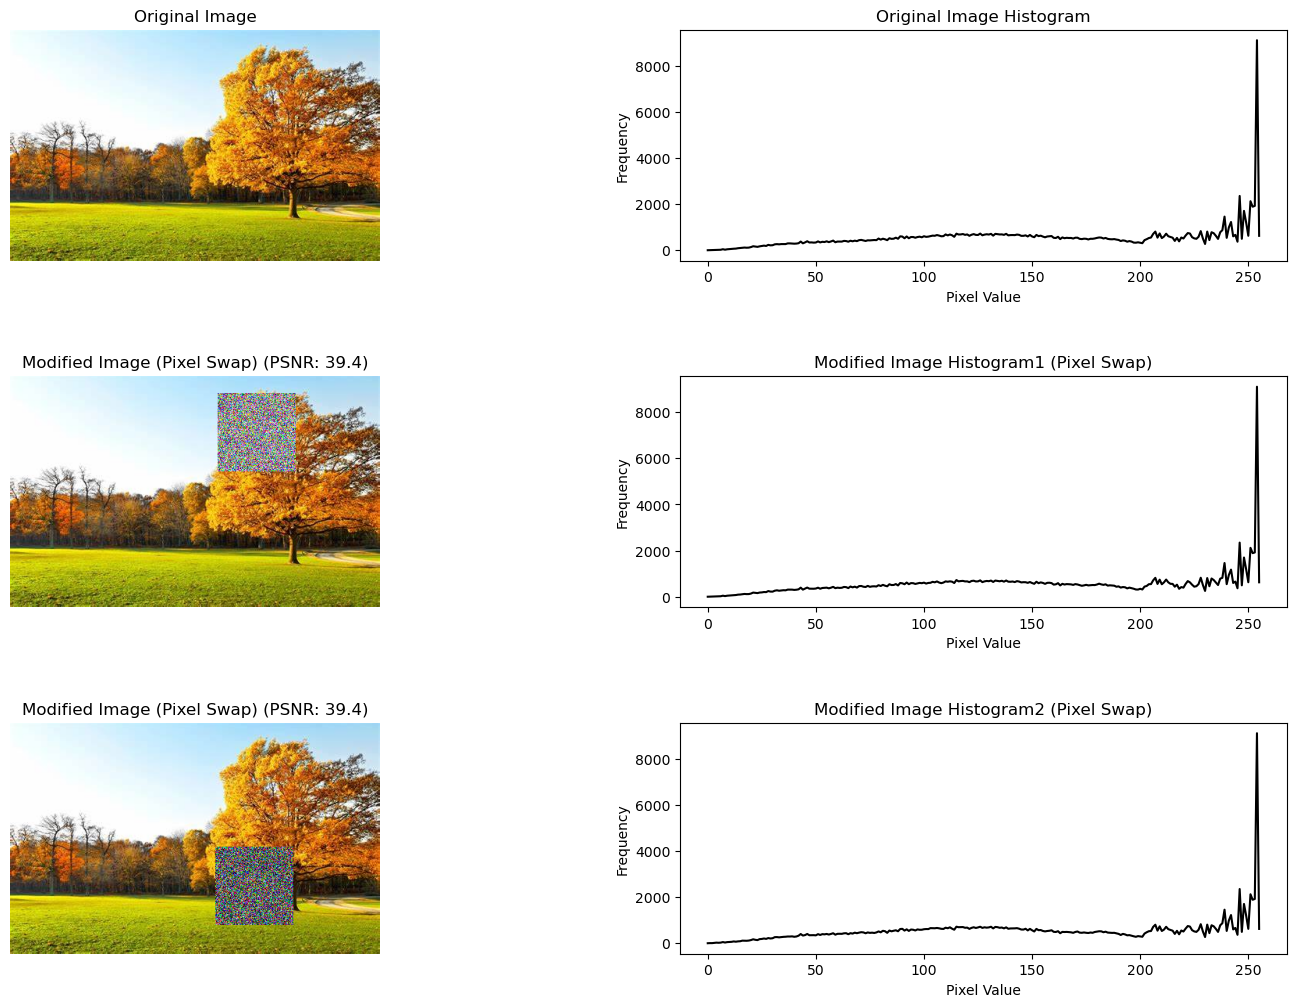

In [100]:
def compute_psnr(image1, image2):
    mse = np.mean((image1 - image2) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel_value = 255.0
    psnr = 20 * np.log10(max_pixel_value / np.sqrt(mse))
    return psnr

def swap_pixel_values(image, window_size=10,seed_value = 42):
    # Get the shape of the image
    height, width, _ = image.shape

    # Randomly select the top-left corner of the window
    top_left_x = np.random.randint(0, width - window_size)
    top_left_y = np.random.randint(0, height - window_size)

    # Extract the 10x10 window
    window = image[top_left_y:top_left_y+window_size, top_left_x:top_left_x+window_size]

    # Flatten the window pixel values
    window_flat = window.flatten()

    # Set a seed for reproducibility
    
    np.random.seed(seed_value)
    # Randomly shuffle the pixel values within the window
    np.random.shuffle(window_flat)

    # Apply the modified values back to the image
    image_modified = image.copy()
    image_modified[top_left_y:top_left_y+window_size, top_left_x:top_left_x+window_size] = window_flat.reshape((window_size, window_size, 3))

    return image_modified

def plot_images_and_histogram(image_path, window_size1=10,window_size2=10,seed_value1=1,seed_value2=2):
    # Load the image
    original_image = cv2.imread(image_path)

    if original_image is None:
        print(f"Error: Unable to load the image from the path: {image_path}")
        return

    # Compute the original histogram
    original_histogram = compute_histogram(original_image)

    # Swap pixel values within a nxm window
    modified_image1 = swap_pixel_values(original_image, window_size1,seed_value1)
    modified_image2 = swap_pixel_values(original_image, window_size2,seed_value2)

    # Compute the modified histogram
    modified_histogram1 = compute_histogram(modified_image1)
    modified_histogram2 = compute_histogram(modified_image2)

    # Compute PSNR for both original and modified images
    psnr_modified1 = compute_psnr(original_image, modified_image1)
    psnr_modified2 = compute_psnr(original_image, modified_image2)

    # Plot in two rows
    plt.figure(figsize=(18, 12))
    plt.subplots_adjust(wspace=0.3, hspace=0.5)

    # First row: Original image and its histogram
    plt.subplot(3, 2, 1)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title(f'Original Image')
    plt.axis('off')

    plt.subplot(3, 2, 2)
    plt.plot(original_histogram, color='black')
    plt.title('Original Image Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

    # Second row: Modified image and its histogram
    plt.subplot(3, 2, 3)
    plt.imshow(cv2.cvtColor(modified_image1, cv2.COLOR_BGR2RGB))
    plt.title(f'Modified Image (Pixel Swap) (PSNR: {psnr_modified1:.1f})')
    plt.axis('off')

    plt.subplot(3, 2, 4)
    plt.plot(modified_histogram1, color='black')
    plt.title('Modified Image Histogram1 (Pixel Swap)')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

    # Third row: Modified image and its histogram
    plt.subplot(3, 2, 5)
    plt.imshow(cv2.cvtColor(modified_image2, cv2.COLOR_BGR2RGB))
    plt.title(f'Modified Image (Pixel Swap) (PSNR: {psnr_modified2:.1f})')
    plt.axis('off')

    plt.subplot(3, 2, 6)
    plt.plot(modified_histogram2, color='black')
    plt.title('Modified Image Histogram2 (Pixel Swap)')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    
    plt.show()

# Provide the path to the nature image
image_path = 'nature_image.jpeg'
plot_images_and_histogram(image_path, window_size1=100,window_size2=100,seed_value1=42,seed_value2=12)


# <font style="color:blue">Limitations of PSNR</font>
- <font size="5">**Sensitivity to Small Changes**</font>
- <font size="5">**Lack of Consideration for Structural Information**</font>
- <font size="5">**Insensitive to Compression Artifacts**</font>
- <font size="5">**Assumption of Gaussian Noise**</font>
- <font size="5">**Non-linearity with Perception**</font>
- <font size="5">**Single Value Metric**</font>: *this is an issue because a single value to represent the quality of an entire signal makes it less informative about localized distortions or variations in quality within the signal*